In [5]:
# part of group 2 project
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from itertools import combinations 
import time

In [4]:
"""
this is how we scale the data
we get the entire data to see how big it is then we can scale the data
we just append the line to a new list once the counter reaches the size 
size is a given percent of the data 
then that list is return with the specified percent of the data
"""
def scaledData(filename, percent):
    data = [i.strip().split() for i in open(filename,'r').readlines()]
    size = int(len(data) * percent)
    print(size)
    count =0
    newItemsets = []
    
    file1 = open(filename, 'r')
    Lines = file1.readlines()
    
    for line in Lines:
        if count<size:
            newItemsets.append(line.strip().split())
            count+=1

    return newItemsets

In [6]:
"""
this is how the data is divied into chunks 
for the son algorithm
the data is just divided into 5
then its then returned 
"""
def divideData(data):
    data1 = []
    data2 = []
    data3 = []
    data4 = []
    for i in range(len(data)):
        if (i<int(len(data)*.25)):
            data1.append(data[i])
        elif (i<int(len(data)*.50)):
            data2.append(data[i])
        elif (i<int(len(data)*.75)):
            data3.append(data[i])
        else:
            data4.append(data[i])
    return data1, data2, data3, data4

In [17]:
"""
son algorithm 
first divided the specified data into 5 chunks using the function above 
then do a pass 1 on each of the chunks from that i get the L1 and frequent item from each chunk
then do a pass 2 then from that you get the frequent items and the Ck from each of the chunks
the have L1 equal to all of the chunks L1's conbined but without duplicates. i do the same for the frequent items from pass 2
then do the same for Ck from pass 2 (combine get rid of duplicates)
then it goes though the data and the combined Ck and counts is then it goes though the counts and calculates the support 
and if the support is larger than the min_support then it gets appened to the new frequent items list and Lk gets new new frequent items as well
then there is a list called current_freq_items this is the current frequent items when comparing to the entire data set 
then symetric difference is used with the frequent items from the chunks combined and the current_freq_items when it was compared with a support 
for the entire data set then the difference is the false_positives.
the false positives are the one that were frequent in the chunk samples of the data set but not frequents in the entire data set.
passX() is then called which just does the freq items until the list is emtpy. its basically the same function the lab 2 uses.
then SON() return the false positives so i can put it into a file called false_positives.txt
"""
def SON(data, min_support):
    start = time.time()
    d1, d2, d3, d4 = divideData(data)

    # Pass1 for son
    L1_d1, freq_item_d1 = passOne(d1, min_support)
    L1_d2, freq_item_d2 = passOne(d2, min_support)
    L1_d3, freq_item_d3 = passOne(d3, min_support)
    L1_d4, freq_item_d4 = passOne(d4, min_support)
    
    L1 = L1_d1 + L1_d2 + L1_d3 + L1_d4
    L1 = list(dict.fromkeys(L1))
    
    # Pass2 for son (creating ck's)
    freq_items_d1, Ck_d1 = passTwo(min_support, 2, d1, freq_item_d1)
    freq_items_d2, Ck_d2 = passTwo(min_support, 2, d2, freq_item_d2)
    freq_items_d3, Ck_d3 = passTwo(min_support, 2, d3, freq_item_d3)
    freq_items_d4, Ck_d4 = passTwo(min_support, 2, d4, freq_item_d4)
    
    freqPairs = freq_items_d1 + freq_items_d2 + freq_items_d3 + freq_items_d4
    freqPairs = list(dict.fromkeys(freqPairs))
    
    
    
    # Merge it together 
    Lk = L1
    freq_items_from_samples = freqPairs
    
    # now to quantify the false positives, by doing through the entire data this time
    Ck = Ck_d1 + Ck_d2 + Ck_d3 + Ck_d4
    Ck = list(dict.fromkeys(Ck))
    count = {}
    for basket in data:
        for item in Ck:
            if item.issubset(basket):
                candidate = frozenset(item)
                if candidate not in count:
                    count[candidate] = 1
                else:
                    count[candidate] += 1
                

    new_freq_items = []   
    current_freq_items = []
    false_positives = [] # A frequent in the sample but not the whole is a false positive.
    for key in count:
        support = count[key]/len(data)
        if support >= min_support:
            new_freq_items.insert(0, key)
            new_freq_items.insert(1, support)
            Lk.insert(0, key)
            current_freq_items.insert(0, key)
    
    difference = set(current_freq_items).symmetric_difference(set(freq_items_from_samples))
    false_positives = list(difference)
    
    print()
    print()
    print("False Posititves: ",false_positives)
    print()
    print()
    print("Lk: ",Lk)
    print()
    print()
    
    print(passesX(Lk,min_support,3,data,new_freq_items))
    return false_positives
    
     

In [8]:
"""
just pass 1.
gets canidates
counts canidates
gets frequents based on support being greater than the min_support 

"""
def passOne(data, min_support):
    start = time.time()
    C1 = []
    for basket in data:
        for item in basket:
            if not [item] in C1:
                C1.append([item])
    C1 = [set(x) for x in C1]
    
    end = time.time()
    print(end-start)
    print("Getting c1")
    start = time.time()
    
    count = {}
    freq_item = []
    L1 = []

    for basket in data:
        for item in C1:
            if item.issubset(basket):
                candidate = frozenset(item)
                if candidate not in count:
                    count[candidate] = 1
                else:
                    count[candidate] += 1
        
    #Calculate support for each item in C1
    end = time.time()
    print(end-start)
    print("Getting support for each C1")
    start = time.time()

    for key in count:
        support = count[key] / len(data)
        if support >= min_support:
            freq_item.insert(0, key)
            freq_item.insert(1, support)
            L1.insert(0, key)
    end = time.time()
    print(end-start)
    print("Checking support vs min")
    return L1, freq_item

In [9]:
"""
just pass 2.
gets canidates pairs
counts canidates
gets frequents based on support being greater than the min_support
returns the frequents items so i can get false positives in the son 
"""
def passTwo(min_support,k,baskets_data,freq_items):
    start2 = time.time()
    Ck = createCk(freq_items[::2],k)
    CoolerCk = []
    print(Ck)
    print("Run =",k)
    count = {}
    freq_items = []
    
    for basket in baskets_data:
        for item in Ck:
            if item.issubset(basket):
                candidate = frozenset(item)
                if candidate not in count:
                    count[candidate] = 1
                else:
                    count[candidate] += 1

        
    for key in count:
        support = count[key]/len(baskets_data)
        if support >= min_support:
            freq_items.insert(0, key)
#             freq_items.insert(1, support) # not needed for the way son is done 
#             Lk.insert(0, key)
    
    end2= time.time()
    print(end2-start2)
    print()
    return freq_items, Ck

In [10]:
"""
creates the canidates
this just goes though the frequents and 
makes new candites based on the value of k
this does like a triangular matrix 
it also sorts it so there isnt duplicaties like {6, 5} or {5, 6}
then its then returned 
"""
def createCk(Lk, k):
    
    cand_list = []
    len_Lk = len(Lk)
    
    for i in range(len_Lk):
        for j in range(i+1, len_Lk):
            L1 = list(Lk[i])[:k-2]
            L2 = list(Lk[j])[:k-2]
            L1.sort()
            L2.sort()
            if L1==L2:
                cand_list.append(Lk[i] | Lk[j])

    return cand_list


"""
this just is recursive until there is no frequent items left
creates Ck based on the k value and the frequent items 
count the canidates 
gets frequents based on support being greater than the min_support
it repeats with the k incremented until there is no frequent item left 
then return the Lk, which is a list of all the frequents 
"""
def passesX(Lk,min_support,k,baskets_data,freq_items):
    start2 = time.time()
    Ck = createCk(freq_items[::2],k)
    CoolerCk = []
    print(Ck)
    print("Run =",k)
    count = {}
    freq_items = []
    
    for basket in baskets_data:
        for item in Ck:
            if item.issubset(basket):
                candidate = frozenset(item)
                if candidate not in count:
                    count[candidate] = 1
                else:
                    count[candidate] += 1

        
    for key in count:
        support = count[key]/len(baskets_data)
        if support >= min_support:
            freq_items.insert(0, key)
            freq_items.insert(1, support)
            Lk.insert(0, key)
    
    end2= time.time()
    print(end2-start2)
    print()
    if len(freq_items)>0:
        passesX(Lk,min_support,k+1,baskets_data,freq_items)
  
        return(Lk)

"""

this is a function where it calculates the time of how long it takes to compute 
son for given parameters. The same function is used to do all of the tests 
it just does min_support of 1% for scale of 20%, 40%, 60%, 80%, 100% then 
min_support of 2% for scale of 20%, 40%, 60%, 80%, 100% then 
min_support of 5% for scale of 20%, 40%, 60%, 80%, 100% 

"""
def runTime(filename, scalePercent, xaxis, min_support):
    times = []
    false_positives_arr = []
    for i in range(len(xaxis)):
        data = scaledData(filename, scalePercent[i])
        start = time.time()
        # function here
        false_positives = SON(data, min_support)
        
        current = time.time()
        seconds = current - start
        times.append(seconds)
        false_positives_arr.append(false_positives)
    return times, false_positives_arr
    

In [33]:
"""
for this function i am basically appending the false positives to a file with the details 
of the min_support and the scale that was used 
"""
def writeFalsePositives(file, false_positives, scalePercent, min_support):
    min_support = min_support*100
    for i in range(len(scalePercent)):
        sP = scalePercent[i]
        mS = min_support
        fS = false_positives[i]
        file.write("Minimum Support = {ms}%, Dataset Scale = {ds}%\n".format(ms=mS, ds=sP))
        file.write("False Positives: {fs}\n".format(fs=fS))
        file.write("\n")

17632
2.031630754470825
Getting c1
8.538808822631836
Getting support for each C1
0.0007834434509277344
Checking support vs min
1.216317892074585
Getting c1
6.647158861160278
Getting support for each C1
0.0008177757263183594
Checking support vs min
1.1724510192871094
Getting c1
6.532852411270142
Getting support for each C1
0.0008466243743896484
Checking support vs min
1.3024075031280518
Getting c1
6.476447343826294
Getting support for each C1
0.0008447170257568359
Checking support vs min
[frozenset({'3735', '3966'}), frozenset({'2990', '3966'}), frozenset({'2238', '3966'}), frozenset({'1859', '3966'}), frozenset({'1715', '3966'}), frozenset({'1659', '3966'}), frozenset({'1393', '3966'}), frozenset({'1327', '3966'}), frozenset({'1233', '3966'}), frozenset({'1198', '3966'}), frozenset({'1146', '3966'}), frozenset({'1121', '3966'}), frozenset({'1004', '3966'}), frozenset({'976', '3966'}), frozenset({'956', '3966'}), frozenset({'856', '3966'}), frozenset({'855', '3966'}), frozenset({'824', 

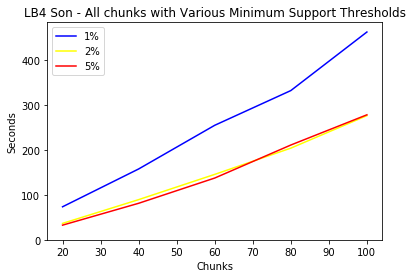

In [12]:
xaxis = [20, 40, 60, 80, 100]
scalePercent = [0.2, 0.4, 0.6, 0.8, 1.0]
filename = 'retail.dat.txt'
title = 'P4 Son - All chunks with Various Minimum Support Thresholds'
xLabel = 'Chunks'
yLabel = 'Seconds'
min_support = [ 0.01, 0.02, 0.05]
time1, false1 = runTime(filename, scalePercent, xaxis, min_support[0])
time2, false2 = runTime(filename, scalePercent, xaxis, min_support[1])
time5, false5 = runTime(filename, scalePercent, xaxis, min_support[2])
pl.plot(xaxis, time1, color='blue', label="1%")                     
pl.plot(xaxis, time2, color='yellow', label="2%")  
pl.plot(xaxis, time5, color='red', label="5%")  
pl.legend(loc="upper left")          
pl.title(title)
pl.ylabel(yLabel)                         
pl.xlabel(xLabel)   
pl.ylim(ymin=0)
title += '.png'
pl.savefig(title)
pl.show() 
# at the bottom you'll see how we put the false positives into the file 
# writeFalsePositives() is the function that was used above

In [35]:
"""
opens 1 file as appending then appends with the nessessary parameters 
so we can properly analyse and quentify the false positives for a 
given min_support and scale
"""
with open("FalsePositives.txt", "a") as file:
    writeFalsePositives(file, false1, [20, 40, 60, 80, 100], min_support[0])
    writeFalsePositives(file, false2, [20, 40, 60, 80, 100], min_support[1])
    writeFalsePositives(file, false5, [20, 40, 60, 80, 100], min_support[2])
file.close()